In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.cm as cm
from scipy.interpolate import interp1d,griddata
from salishsea_tools import (nc_tools, gsw_calls,viz_tools)
import cmocean.cm as cm
from fancyimpute import KNN

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


### The model crashes at [j location 147 (Fortran)] and [i from 2 to 10] and [k from 4 to 14]

We will take a look at the IC files, BC files and our bathymetry files to find out if there is something fishy stuff in those regions before proceeding to look at our run results

In [7]:
init_file = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/initial_conditions/West_coast_NEMO_IC_high_resolution.nc')

nc_tools.show_dimensions(init_file);
nc_tools.show_variables(init_file);

<class 'netCDF4._netCDF4.Dimension'>: name = 'xb', size = 290

<class 'netCDF4._netCDF4.Dimension'>: name = 'yb', size = 390

<class 'netCDF4._netCDF4.Dimension'>: name = 'deptht', size = 40

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 1

odict_keys(['nav_lat', 'nav_lon', 'deptht', 'time_counter', 'votemper', 'vosaline'])


In [8]:
votemper_NEMO_IC = init_file.variables['votemper'][0,...]
vosaline_NEMO_IC = init_file.variables['vosaline'][0,...]
depth_t = init_file.variables['deptht'][:]
lat = init_file.variables['nav_lat'][:]
lon = init_file.variables['nav_lon'][:]

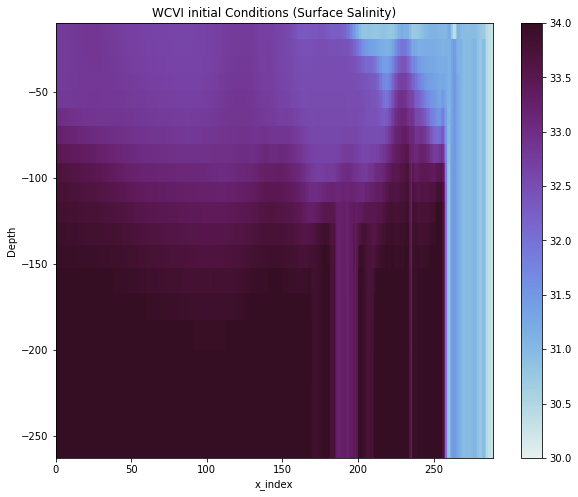

In [4]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_files/bathy_meter_high_res_cubic_truncated_flatten_2000m.nc'

bathymetry = nc.Dataset(bathy).variables['Bathymetry'][:]

# y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)
y_slice = np.arange(146)
z_slice = np.arange(0,  40)


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
#cmap = plt.get_cmap('winter_r')
#cmap.set_bad('burlywood')
mesh = ax.pcolormesh(x_slice, -depth_t[:20],vosaline_NEMO_IC[:20,146,:], vmin =30, vmax=34, cmap=cm.dense)
# viz_tools.plot_land_mask(ax, bathy , xslice=x_slice, yslice=y_slice, color='burlywood')
# viz_tools.plot_coastline(ax, bathy, color = 'burlywood')
ax.set_xlabel('x_index')
ax.set_ylabel('Depth')
ax.set_title('WCVI initial Conditions (Surface Salinity)')
fig.colorbar(mesh)

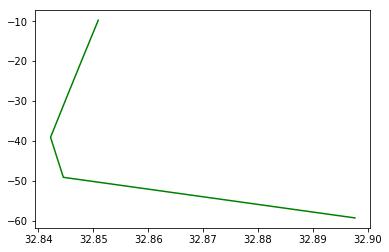

In [5]:
plt.plot(vosaline_NEMO_IC[:6,146,22], -depth_t[:6], 'g')

In [74]:
depth_t

array([    9.7511425 ,    19.44849014,    29.23366356,    39.1260376 ,
          49.14923859,    59.33207321,    69.7096405 ,    80.32471466,
          91.2293396 ,   102.48684692,   114.17419434,   126.38482666,
         139.23202515,   152.85292053,   167.41317749,   183.11247253,
         200.1907196 ,   218.9352417 ,   239.68850708,   262.85678101,
         288.91873169,   318.43414307,   352.05148315,   390.51361084,
         434.65979004,   485.42272949,   543.81848145,   610.9274292 ,
         687.86468506,   775.73974609,   875.60675049,   988.40753174,
        1114.91381836,  1255.67419434,  1410.97424316,  1580.8137207 ,
        1764.9074707 ,  1962.70678711,  2173.43969727,  2396.16479492], dtype=float32)

### Now we used cubic horizontal interpolation:

### we turned off to no boundaries for our model and it still crashes which means that we need to sort out our initial conditions and bathymetry file first

In [10]:
init_file_lin = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/initial_conditions/West_coast_NEMO_IC_high_resolution_linear.nc')


In [11]:
votemper_NEMO_IC_lin = init_file_lin.variables['votemper'][0,...]
vosaline_NEMO_IC_lin = init_file_lin.variables['vosaline'][0,...]

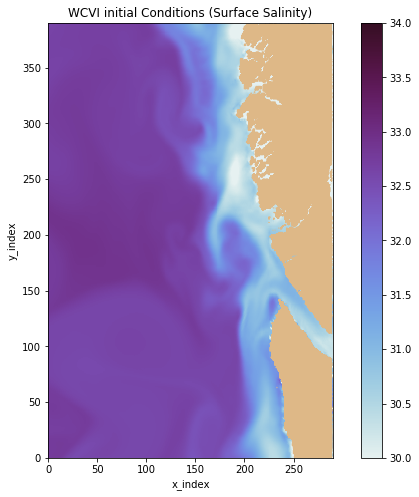

In [12]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_files/bathy_meter_high_res_cubic_truncated_flatten_2000m.nc'

bathymetry = nc.Dataset(bathy).variables['Bathymetry'][:]

y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
#cmap = plt.get_cmap('winter_r')
#cmap.set_bad('burlywood')
mesh = ax.pcolormesh(vosaline_NEMO_IC_lin[0,...], vmin =30, vmax=34, cmap=cm.dense)
viz_tools.plot_land_mask(ax, bathy , xslice=x_slice, yslice=y_slice, color='burlywood')
viz_tools.plot_coastline(ax, bathy, color = 'burlywood')
ax.set_xlabel('x_index')
ax.set_ylabel('y_index')
ax.set_title('WCVI initial Conditions (Surface Salinity)')
fig.colorbar(mesh)

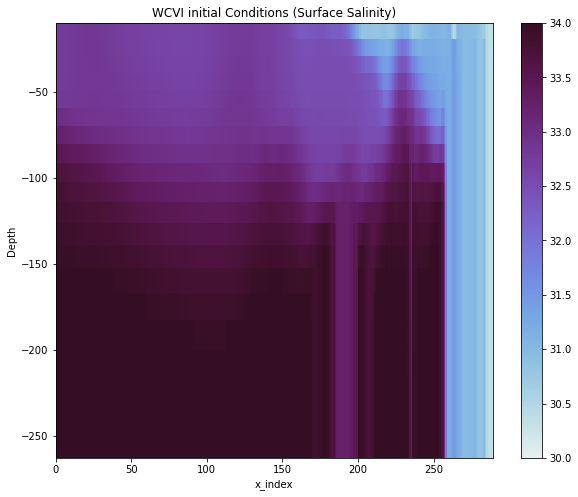

In [13]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_files/bathy_meter_high_res_cubic_truncated_flatten_2000m.nc'

bathymetry = nc.Dataset(bathy).variables['Bathymetry'][:]

# y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)
y_slice = np.arange(146)
z_slice = np.arange(0,  40)


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
#cmap = plt.get_cmap('winter_r')
#cmap.set_bad('burlywood')
mesh = ax.pcolormesh(x_slice, -depth_t[:20],vosaline_NEMO_IC_lin[:20,146,:], vmin =30, vmax=34, cmap=cm.dense)
# viz_tools.plot_land_mask(ax, bathy , xslice=x_slice, yslice=y_slice, color='burlywood')
# viz_tools.plot_coastline(ax, bathy, color = 'burlywood')
ax.set_xlabel('x_index')
ax.set_ylabel('Depth')
ax.set_title('WCVI initial Conditions (Surface Salinity)')
fig.colorbar(mesh)

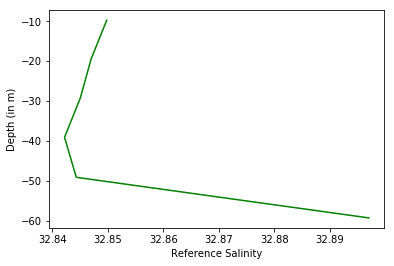

In [14]:
plt.plot(vosaline_NEMO_IC_lin[:6,146,22], -depth_t[:6], 'g')
plt.xlabel("Reference Salinity")
plt.ylabel("Depth (in m)")

### Q) Is JP's output unstable ?

In [15]:
print("The location of the point is ", lat[146,22], lon[146,22])

The location of the point is  47.538 -127.352


In [16]:
fname = '/home/ssahu/saurav/JP_BC/cat_42_days_T.nc'

gridT = xr.open_dataset(fname)

mask = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/meshmask_files/JP_mesh_mask.nc')

tmask_JP = mask.variables['tmask'][0,:,55:420,446:730]

votemper_JP = np.array(gridT['votemper'][1,:,55:420,446:730]) #Our 1st day of NEMO run (set in namelist and atmos files from that day)  is second day of data which starts from beginning of month
votemper_JP[...] = np.ma.masked_array(votemper_JP[...], mask = tmask_JP[...])
votemper_JP[votemper_JP == 0] =['Nan']

vosaline_JP = np.array(gridT['vosaline'][1,:,55:420,446:730])
vosaline_JP[...] = np.ma.masked_array(vosaline_JP[...], mask = tmask_JP[...])
vosaline_JP[vosaline_JP == 0] = ['Nan']

glamt_bc_JP = np.array(gridT['nav_lon'][55:420,446:730])
gphit_bc_JP = np.array(gridT['nav_lat'][55:420,446:730])
deptht_JP = np.array(gridT['deptht'][:])

In [17]:
np.where(glamt_bc_JP<-127)

(array([  0,   0,   0, ..., 364, 364, 364]),
 array([ 0,  1,  2, ..., 82, 83, 84]))

In [18]:
print(np.where(gphit_bc_JP<47.54))
print(np.where(glamt_bc_JP<-127 ))

(array([  0,   0,   0, ..., 156, 156, 156]), array([  0,   1,   2, ..., 266, 267, 268]))
(array([  0,   0,   0, ..., 364, 364, 364]), array([ 0,  1,  2, ..., 82, 83, 84]))


In [19]:
gphit_bc_JP[136,87]

47.451847

In [20]:
glamt_bc_JP[136,87]

-127.37125

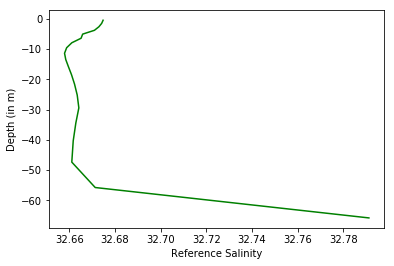

In [21]:
plt.plot(vosaline_JP[:20,136,85], -deptht_JP[:20], 'g')
plt.xlabel("Reference Salinity")
plt.ylabel("Depth (in m)")

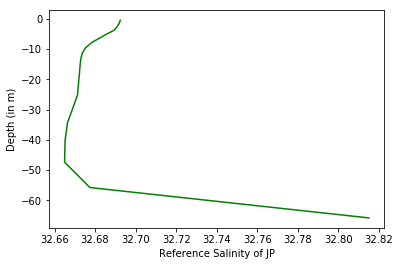

In [22]:
plt.plot(vosaline_JP[:20,137,85], -deptht_JP[:20], 'g')
plt.xlabel("Reference Salinity of JP")
plt.ylabel("Depth (in m)")

In [23]:
print("The location of the point is ", glamt_bc_JP[137,85], gphit_bc_JP[137,85])

The location of the point is  -127.424 47.4692


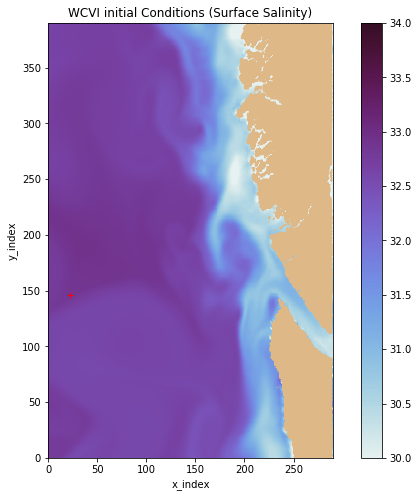

In [24]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_files/bathy_meter_high_res_cubic_truncated_flatten_2000m.nc'

bathymetry = nc.Dataset(bathy).variables['Bathymetry'][:]

y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
#cmap = plt.get_cmap('winter_r')
#cmap.set_bad('burlywood')
mesh = ax.pcolormesh(vosaline_NEMO_IC_lin[0,...], vmin =30, vmax=34, cmap=cm.dense)
viz_tools.plot_land_mask(ax, bathy , xslice=x_slice, yslice=y_slice, color='burlywood')
viz_tools.plot_coastline(ax, bathy, color = 'burlywood')
ax.set_xlabel('x_index')
ax.set_ylabel('y_index')
ax.set_title('WCVI initial Conditions (Surface Salinity)')
fig.colorbar(mesh)

ax.plot(
    x_slice[22], y_slice[146],
    linestyle='-', marker='+', color='Red',
    label='Unstable Point',
)




In [25]:
tracers = nc.Dataset('/ocean/ssahu/CANYONS/Results/ORCINUS_RESULTS/no_bdy_ic_data_high_res/WCVI_1h_20160402_20160509_grid_T.nc')

bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

In [26]:
ssh = tracers.variables['sossheig'][:]
lats = tracers.variables['nav_lat'][:]
lons = tracers.variables['nav_lon'][:]
sal = tracers.variables['vosaline'][:]
zlevels = tracers.variables['deptht']

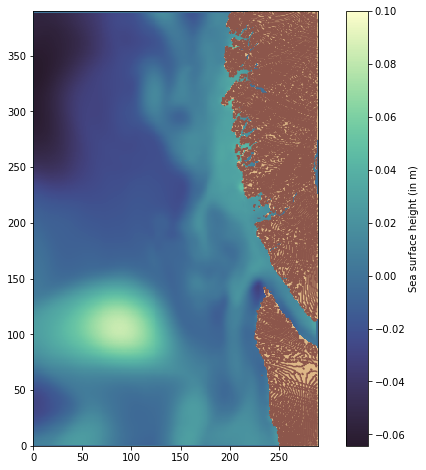

In [27]:
ssh0 = np.ma.masked_values(ssh[0], bathymetry)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(ssh0)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(ssh0, cmap=cmap, vmax = 0.1)
viz_tools.plot_land_mask(ax, bathy , color='burlywood')
viz_tools.plot_coastline(ax, bathy, color= 'tab:brown')
cbar = fig.colorbar(mesh)
cbar.set_label('Sea surface height (in m)')

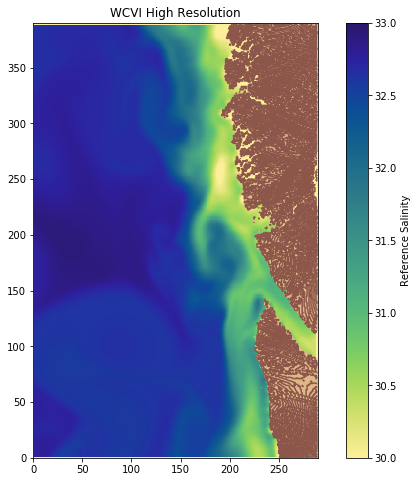

In [28]:
sal0 = np.ma.masked_values(sal[0,0,...], bathymetry)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sal0)
cmap = plt.get_cmap(cm.haline_r)
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(sal0, cmap=cmap, vmin = 30, vmax = 33)
viz_tools.plot_land_mask(ax, bathy , color='burlywood')
viz_tools.plot_coastline(ax, bathy, color= 'tab:brown')
cbar = fig.colorbar(mesh)
cbar.set_label('Reference Salinity')
ax.set_title("WCVI High Resolution")

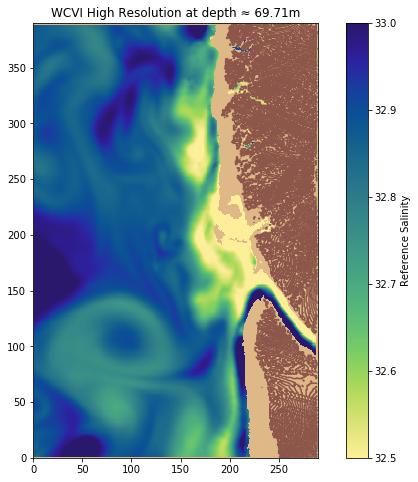

In [60]:
t, zlevel = 0, 6


sal0 = np.ma.masked_values(sal[t, zlevel,...], 0)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sal0)
cmap = plt.get_cmap(cm.haline_r)
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(sal0, cmap=cmap, vmin = 32.5, vmax = 33)
viz_tools.plot_land_mask(ax, bathy , color='burlywood')
viz_tools.plot_coastline(ax, bathy, color= 'tab:brown')
cbar = fig.colorbar(mesh)
cbar.set_label('Reference Salinity')
ax.set_title("WCVI High Resolution at depth \u2248 {d:.2f}{z.units}".format( d=zlevels[zlevel], z=zlevels))

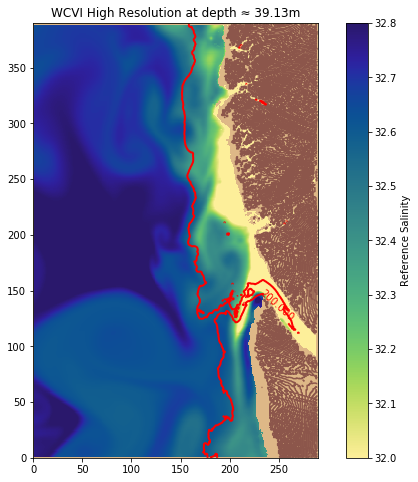

In [83]:
t, zlevel = 0, 3


sal0 = np.ma.masked_values(sal[t, zlevel,...], 0)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sal0)
cmap = plt.get_cmap(cm.haline_r)
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(sal0, cmap=cmap, vmin = 32, vmax = 32.8)
viz_tools.plot_land_mask(ax, bathy , color='burlywood')
viz_tools.plot_coastline(ax, bathy, color= 'tab:brown')
cbar = fig.colorbar(mesh)
cbar.set_label('Reference Salinity')
CS = ax.contour(bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


ax.clabel(CS)
ax.set_title("WCVI High Resolution at depth \u2248 {d:.2f}{z.units}".format( d=zlevels[zlevel], z=zlevels))

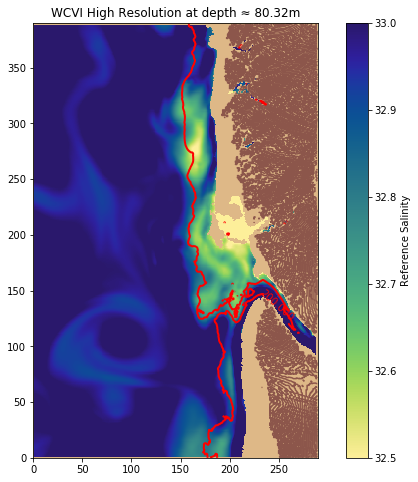

In [84]:
t, zlevel = 0, 7


sal0 = np.ma.masked_values(sal[t, zlevel,...], 0)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sal0)
cmap = plt.get_cmap(cm.haline_r)
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(sal0, cmap=cmap, vmin = 32.5, vmax = 33)
viz_tools.plot_land_mask(ax, bathy , color='burlywood')
viz_tools.plot_coastline(ax, bathy, color= 'tab:brown')
cbar = fig.colorbar(mesh)
cbar.set_label('Reference Salinity')
CS = ax.contour(bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


ax.clabel(CS)
ax.set_title("WCVI High Resolution at depth \u2248 {d:.2f}{z.units}".format( d=zlevels[zlevel], z=zlevels))

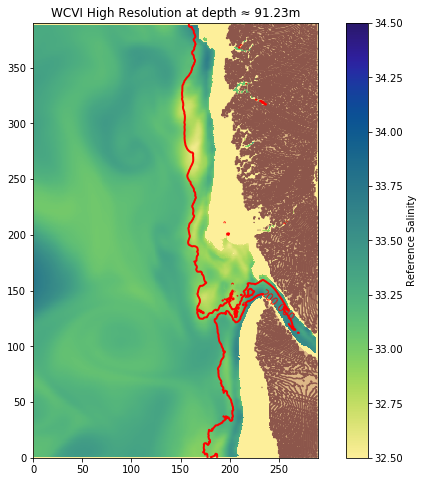

In [88]:
t, zlevel = 0, 8


sal0 = np.ma.masked_values(sal[t, zlevel,...], bathymetry)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sal0)
cmap = plt.get_cmap(cm.haline_r)
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(sal0, cmap=cmap, vmin = 32.5, vmax = 34.5)
viz_tools.plot_land_mask(ax, bathy , color='burlywood')
viz_tools.plot_coastline(ax, bathy, color= 'tab:brown')
cbar = fig.colorbar(mesh)
cbar.set_label('Reference Salinity')
CS = ax.contour(bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


ax.clabel(CS)
ax.set_title("WCVI High Resolution at depth \u2248 {d:.2f}{z.units}".format( d=zlevels[zlevel], z=zlevels))

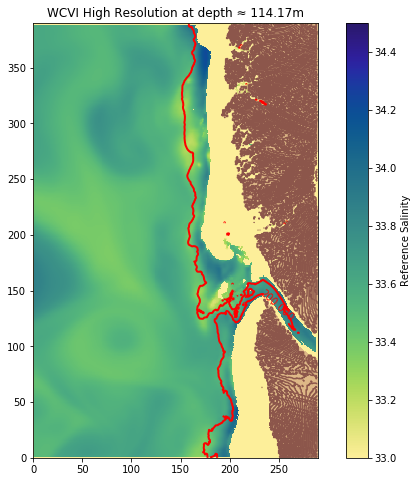

In [92]:
t, zlevel = 0, 10


sal0 = np.ma.masked_values(sal[t, zlevel,...], bathymetry)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sal0)
cmap = plt.get_cmap(cm.haline_r)
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(sal0, cmap=cmap, vmin = 33, vmax = 34.5)
viz_tools.plot_land_mask(ax, bathy , color='burlywood')
viz_tools.plot_coastline(ax, bathy, color= 'tab:brown')
cbar = fig.colorbar(mesh)
cbar.set_label('Reference Salinity')
CS = ax.contour(bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


ax.clabel(CS)
ax.set_title("WCVI High Resolution at depth \u2248 {d:.2f}{z.units}".format( d=zlevels[zlevel], z=zlevels))

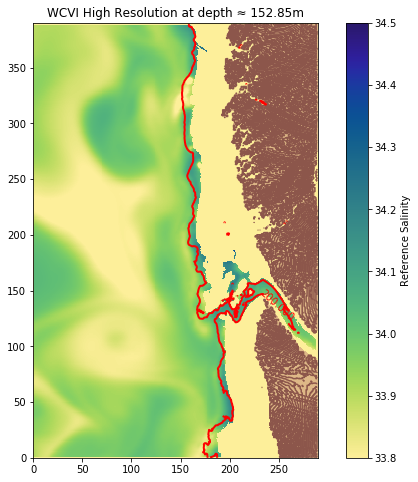

In [97]:
t, zlevel = 0, 13


sal0 = np.ma.masked_values(sal[t, zlevel,...], bathymetry)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sal0)
cmap = plt.get_cmap(cm.haline_r)
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(sal0, cmap=cmap, vmin = 33.8, vmax = 34.5)
viz_tools.plot_land_mask(ax, bathy , color='burlywood')
viz_tools.plot_coastline(ax, bathy, color= 'tab:brown')
cbar = fig.colorbar(mesh)
cbar.set_label('Reference Salinity')
CS = ax.contour(bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


ax.clabel(CS)
ax.set_title("WCVI High Resolution at depth \u2248 {d:.2f}{z.units}".format( d=zlevels[zlevel], z=zlevels))

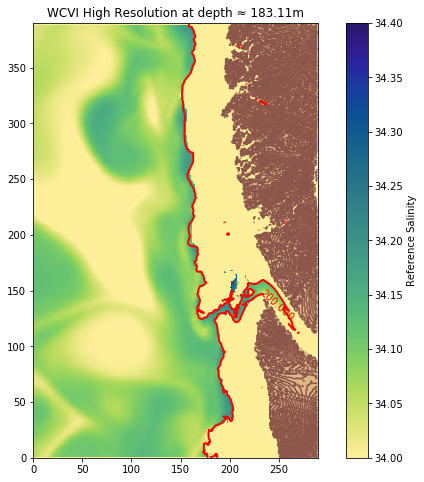

In [102]:
t, zlevel = 0, 15


sal0 = np.ma.masked_values(sal[t, zlevel,...], bathymetry)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sal0)
cmap = plt.get_cmap(cm.haline_r)
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(sal0, cmap=cmap, vmin = 34, vmax = 34.4)
viz_tools.plot_land_mask(ax, bathy , color='burlywood')
viz_tools.plot_coastline(ax, bathy, color= 'tab:brown')
cbar = fig.colorbar(mesh)
cbar.set_label('Reference Salinity')
CS = ax.contour(bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


ax.clabel(CS)
ax.set_title("WCVI High Resolution at depth \u2248 {d:.2f}{z.units}".format( d=zlevels[zlevel], z=zlevels))

#### We have downwelling winds so we have downwelled low salinity water at depths near the surface and high salininty upwelled water at the shelf break depths

### Vertical sections

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


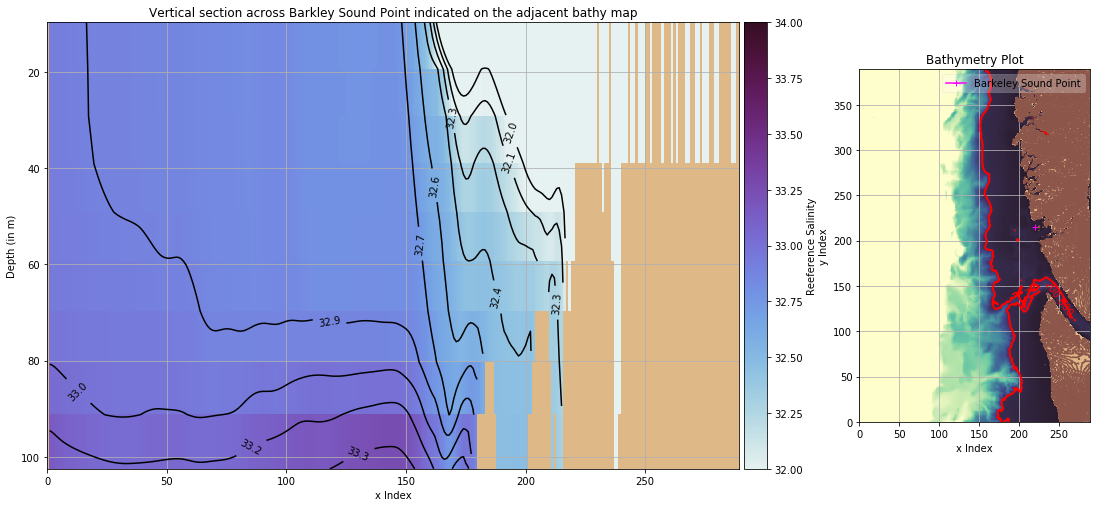

In [110]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

bathymetry = nc.Dataset(bathy).variables['Bathymetry'][:]

y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)


# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, bathymetry, cmap=cmap)
axr.plot(
    x_slice[220], y_slice[215],
    linestyle='-', marker='+', color='magenta',
    label='Barkeley Sound Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))

viz_tools.plot_land_mask(axr, bathy , color='burlywood')
viz_tools.plot_coastline(axr, bathy, color= 'tab:brown')

axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 0 
cmap = plt.get_cmap(cm.dense)
cmap.set_bad(land_colour)
sal_0 = sal[t, :10, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:10])
mesh = axl.pcolormesh(x_slice, zlevels[:10], sal_tzyx[:10,215,x_slice], cmap=cmap, vmin=32, vmax=34)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(x_slice, zlevels[:10], sal_tzyx[:10,215,x_slice], np.arange(32, 34, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
axl.set_ylabel("Depth (in m)")
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Barkley Sound Point indicated on the adjacent bathy map')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


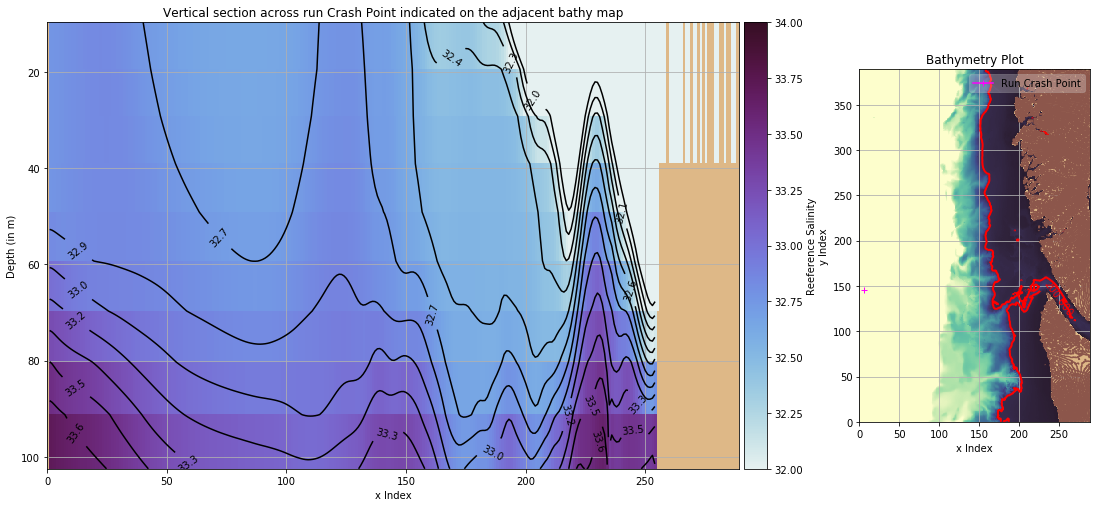

In [116]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

bathymetry = nc.Dataset(bathy).variables['Bathymetry'][:]

y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)


# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, bathymetry, cmap=cmap)
axr.plot(
    x_slice[6], y_slice[146],
    linestyle='-', marker='+', color='magenta',
    label='Run Crash Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))

viz_tools.plot_land_mask(axr, bathy , color='burlywood')
viz_tools.plot_coastline(axr, bathy, color= 'tab:brown')

axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 0 
cmap = plt.get_cmap(cm.dense)
cmap.set_bad(land_colour)
sal_0 = sal[t, :10, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:10])
mesh = axl.pcolormesh(x_slice, zlevels[:10], sal_tzyx[:10,146,x_slice], cmap=cmap, vmin=32, vmax=34)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(x_slice, zlevels[:10], sal_tzyx[:10,146,x_slice], np.arange(32, 34, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
axl.set_ylabel("Depth (in m)")
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across run Crash Point indicated on the adjacent bathy map')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


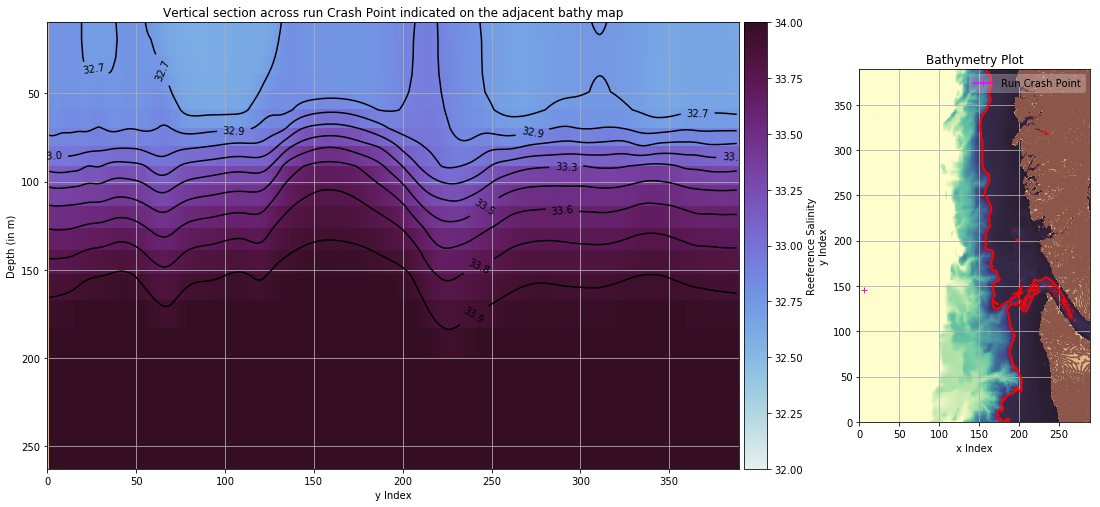

In [121]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

bathymetry = nc.Dataset(bathy).variables['Bathymetry'][:]

y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)


# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, bathymetry, cmap=cmap)
axr.plot(
    x_slice[6], y_slice[146],
    linestyle='-', marker='+', color='magenta',
    label='Run Crash Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))

viz_tools.plot_land_mask(axr, bathy , color='burlywood')
viz_tools.plot_coastline(axr, bathy, color= 'tab:brown')

axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 0 
cmap = plt.get_cmap(cm.dense)
cmap.set_bad(land_colour)
sal_0 = sal[t, :20, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:20])
mesh = axl.pcolormesh(y_slice, zlevels[:20], sal_tzyx[:20,y_slice,6], cmap=cmap, vmin=32, vmax=34)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(y_slice, zlevels[:20], sal_tzyx[:20,y_slice,6], np.arange(32, 34, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('y Index')
axl.set_ylabel("Depth (in m)")
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across run Crash Point indicated on the adjacent bathy map')